<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/21_RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format if needed
df.set_index('Date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


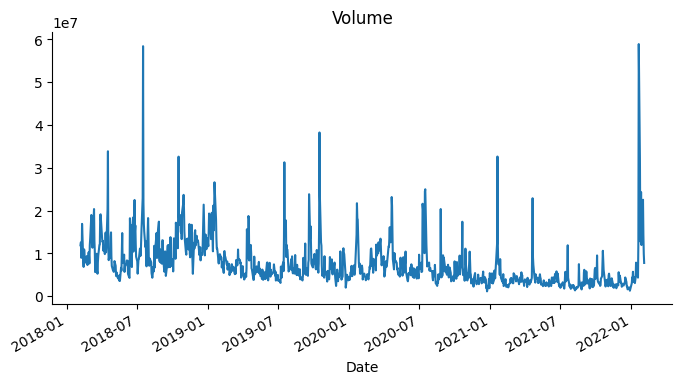

In [12]:
from matplotlib import pyplot as plt
df['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

The `seasonal_decompose` function is part of the `statsmodels` library in Python and is used for decomposing time series data into its constituent components, namely trend, seasonal, and residual (or irregular) components. This decomposition helps in understanding the underlying patterns and structures within a time series, which can be useful for analysis, visualization, and forecasting tasks.

Here's an overview of how `seasonal_decompose` works:

1. **Input:**
   - The input to `seasonal_decompose` is typically a time series data series, such as stock prices, sales data, temperature readings, etc.
   - The input data should have a temporal ordering (i.e., sorted by time) for accurate decomposition.

2. **Decomposition Components:**
   - Trend: Represents the long-term movement or direction of the data.
   - Seasonal: Captures periodic patterns or cycles that repeat at fixed intervals (e.g., daily, monthly, yearly).
   - Residual (Irregular): Accounts for random fluctuations or noise in the data that cannot be attributed to the trend or seasonal components.

3. **Parameters:**
   - `x`: Input time series data.
   - `model`: Specifies the decomposition model. Common choices include 'additive' (default) and 'multiplicative' depending on the nature of the data.
   - `filt`: Applies a filter to the data before decomposition (optional).
   - `freq`: Specifies the frequency of the seasonal component. If not provided, it's inferred from the data.
   - `extrapolate_trend`: Determines whether to extrapolate the trend beyond the observed data (default is False).

4. **Usage:**
   ```python
   from statsmodels.tsa.seasonal import seasonal_decompose

   # Assuming 'data' is your time series data
   result = seasonal_decompose(data, model='additive', period=12)
   ```

5. **Accessing Components:**
   - Once you run `seasonal_decompose`, you can access the individual components (trend, seasonal, residual) using the `result` object.
   - For example, `result.trend` gives you the trend component, `result.seasonal` gives the seasonal component, and `result.resid` gives the residual component.

6. **Plotting:**
   - You can visualize the decomposed components using `result.plot()` to generate a plot with subplots for each component.

Here's a basic example of how to use `seasonal_decompose`:

```python
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'data' is your time series data
result = seasonal_decompose(data, model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()
```

Adjust the parameters (`model`, `period`, etc.) based on your specific data and analysis requirements.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result = seasonal_decompose(df['Close'], period=12)

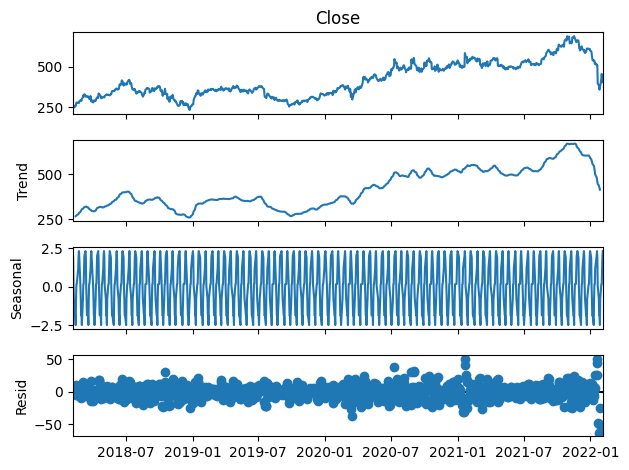

In [9]:
result.plot();

In [10]:
len(df)

1009

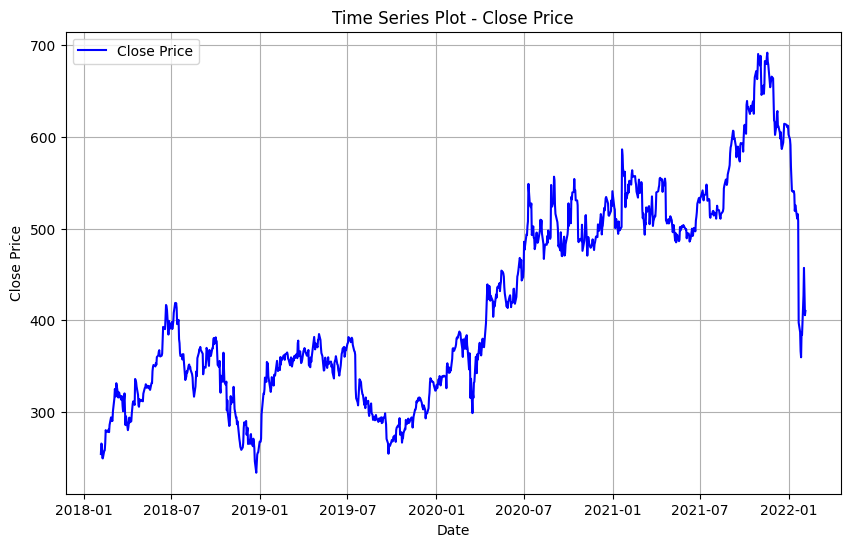

In [20]:
# Plotting the 'close' column as a time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot - Close Price')
plt.legend()
plt.grid(True)
plt.show()

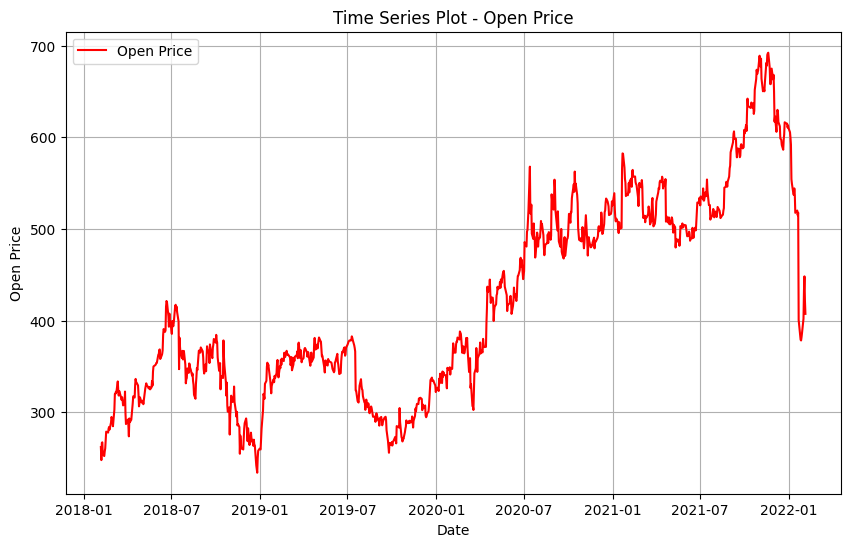

In [19]:
# Plotting the 'Open' column as a time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Open Price', color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Time Series Plot - Open Price')
plt.legend()
plt.grid(True)
plt.show()

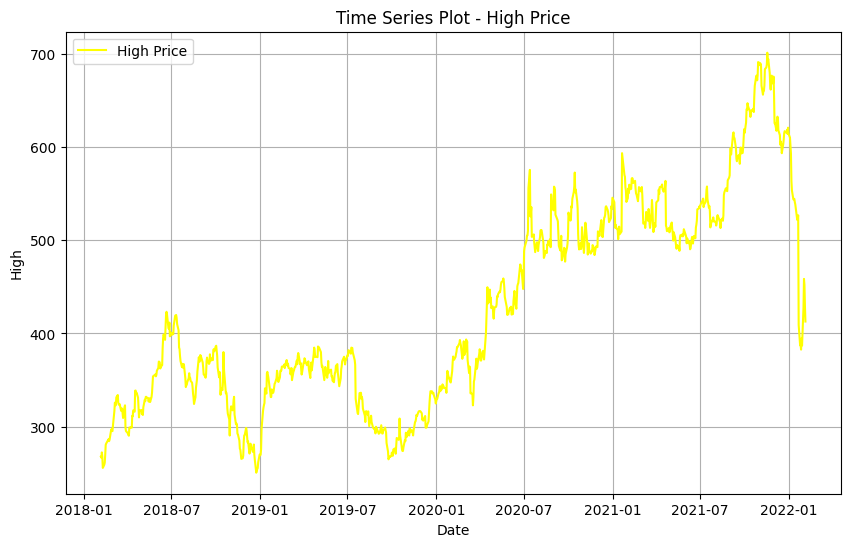

In [21]:
# Plotting the 'High' column as a time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['High'], label='High Price', color='yellow')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Time Series Plot - High Price')
plt.legend()
plt.grid(True)
plt.show()

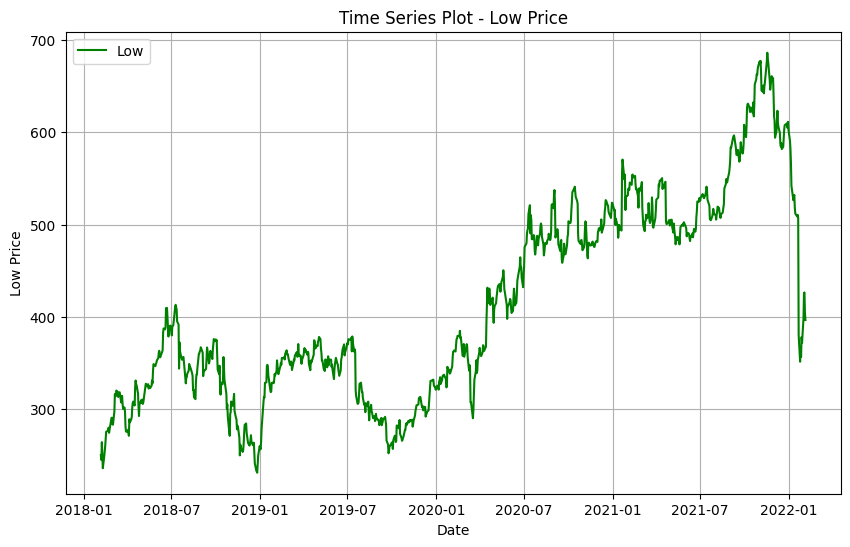

In [22]:
# Plotting the 'Low' column as a time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Low'], label='Low', color='green')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Time Series Plot - Low Price')
plt.legend()
plt.grid(True)
plt.show()

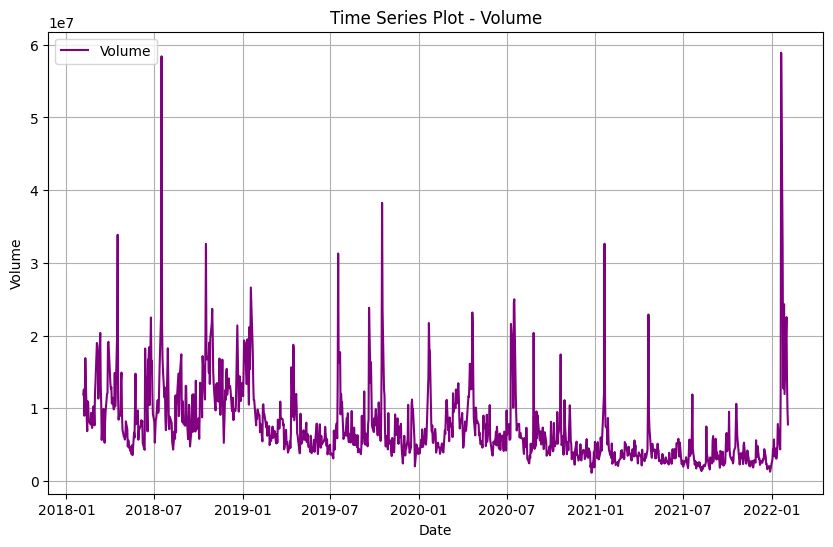

In [18]:
# Plotting the 'Volume' column as a time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='purple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Time Series Plot - Volume')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


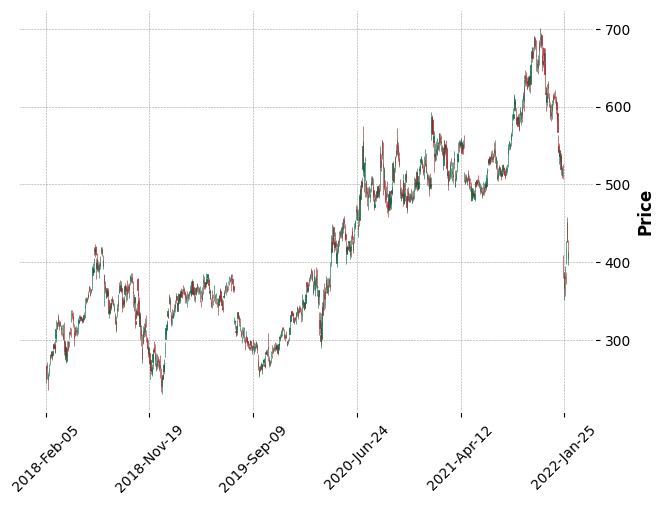

In [25]:
import mplfinance as mpf

# Plotting the candlestick chart
mpf.plot(df, type='candle', style='', ylabel='Price', ylabel_lower='Volume')

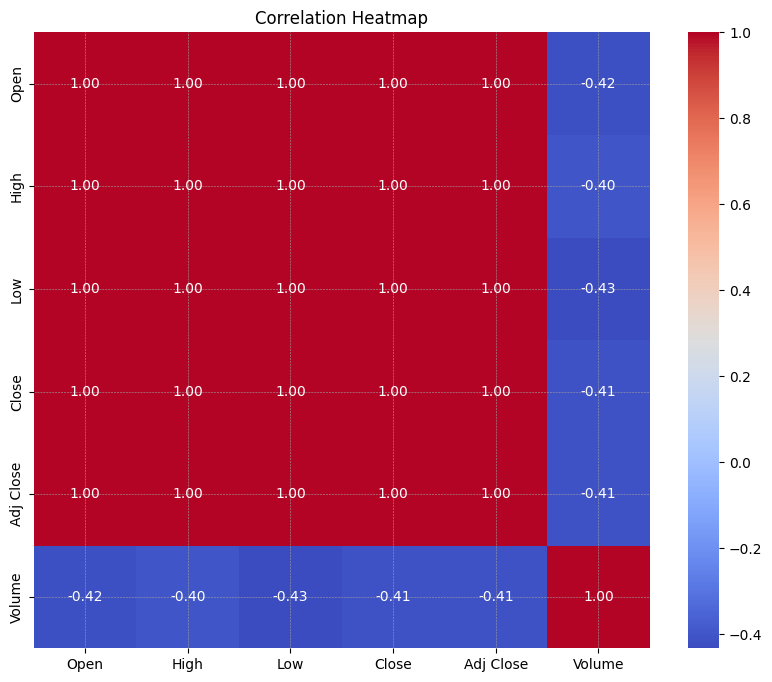

In [26]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [29]:
df1 = df[['Volume']]

# Displaying the subsetted DataFrame
print(df1.head())

              Volume
Date                
2018-02-05  11896100
2018-02-06  12595800
2018-02-07   8981500
2018-02-08   9306700
2018-02-09  16906900


In [30]:
split_index = int(len(df1) * 0.8)  # split index for an 80-20 split
train = df1.iloc[:split_index]
test = df1.iloc[split_index:]

# Print the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (807, 1)
Testing set shape: (202, 1)


In [31]:
train

,Volume
Date,
2018-02-05,11896100
2018-02-06,12595800
2018-02-07,8981500
2018-02-08,9306700
2018-02-09,16906900
...,...
2021-04-14,3740300
2021-04-15,3139100
2021-04-16,3209100


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [34]:
scaled_train

array([[0.18775582],
       [0.19997416],
       [0.13686036],
       [0.14253908],
       [0.27525565],
       [0.12906172],
       [0.09973038],
       [0.17161896],
       [0.16791172],
       [0.12517637],
       [0.11568738],
       [0.14366365],
       [0.13528876],
       [0.10752902],
       [0.15933602],
       [0.14445644],
       [0.11367049],
       [0.18838446],
       [0.21306211],
       [0.31156315],
       [0.30352528],
       [0.27918989],
       [0.17804681],
       [0.23322926],
       [0.33571518],
       [0.20558652],
       [0.16294197],
       [0.0785609 ],
       [0.10808607],
       [0.15333948],
       [0.08465523],
       [0.07194271],
       [0.12082652],
       [0.14643665],
       [0.18936584],
       [0.19076806],
       [0.31133265],
       [0.31434663],
       [0.21411858],
       [0.20170466],
       [0.20553064],
       [0.16608692],
       [0.17987511],
       [0.15208918],
       [0.16617947],
       [0.23981602],
       [0.15900074],
       [0.190

The `TimeseriesGenerator` is a utility in Keras (part of TensorFlow) that helps in creating batches of temporal data for time series forecasting or sequence prediction tasks. It generates samples and corresponding targets for training a model using sliding windows of time series data.

Here's an overview of how `TimeseriesGenerator` works:

1. **Input Data:**
   - Input data for `TimeseriesGenerator` should be a 1D or 2D array representing your time series data.
   - If your data is 1D (e.g., a single time series), it should be shaped as `(n_samples,)`.
   - If your data is 2D (e.g., multiple time series or features), it should be shaped as `(n_samples, n_features)`.

2. **Parameters:**
   - `length`: Number of time steps in the input sequences (window size).
   - `sampling_rate`: Stride between consecutive input sequences. Default is 1.
   - `batch_size`: Number of samples in each batch.
   - `stride`: Number of time steps to move the sliding window forward between batches. Default is 1.
   - `start_index`, `end_index`: Optional parameters to specify the start and end indices of the data to use.
   - `shuffle`: Whether to shuffle the samples.
   - `reverse`: Whether to reverse the order of samples.
   - `batch_shape`: Shape of each batch, useful when dealing with 2D input data.

3. **Usage:**
   ```python
   from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

   # Assuming data is your 1D or 2D input data
   data_generator = TimeseriesGenerator(data, targets, length=..., batch_size=..., ...)
   ```

4. **Generated Batches:**
   - Each batch generated by `TimeseriesGenerator` consists of input sequences (X) and corresponding targets (y).
   - The input sequence X at each time step contains 'length' time steps from the original data.
   - The target y is typically the next time step(s) after the input sequence.

5. **Example Usage:**
   ```python
   data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Example 1D time series data
   targets = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Example targets for forecasting

   data_generator = TimeseriesGenerator(data, targets, length=3, batch_size=1)
   for i in range(len(data_generator)):
       X, y = data_generator[i]
       print(f"Batch {i}: Input = {X}, Target = {y}")
   ```

In this example, `TimeseriesGenerator` creates batches of size 1 with input sequences of length 3 (`length=3`) from the data and corresponding targets for time series forecasting. Adjust the parameters based on your specific data and modeling requirements.

In [35]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [36]:
scaled_train

array([[0.18775582],
       [0.19997416],
       [0.13686036],
       [0.14253908],
       [0.27525565],
       [0.12906172],
       [0.09973038],
       [0.17161896],
       [0.16791172],
       [0.12517637],
       [0.11568738],
       [0.14366365],
       [0.13528876],
       [0.10752902],
       [0.15933602],
       [0.14445644],
       [0.11367049],
       [0.18838446],
       [0.21306211],
       [0.31156315],
       [0.30352528],
       [0.27918989],
       [0.17804681],
       [0.23322926],
       [0.33571518],
       [0.20558652],
       [0.16294197],
       [0.0785609 ],
       [0.10808607],
       [0.15333948],
       [0.08465523],
       [0.07194271],
       [0.12082652],
       [0.14643665],
       [0.18936584],
       [0.19076806],
       [0.31133265],
       [0.31434663],
       [0.21411858],
       [0.20170466],
       [0.20553064],
       [0.16608692],
       [0.17987511],
       [0.15208918],
       [0.16617947],
       [0.23981602],
       [0.15900074],
       [0.190

In [37]:
n_input = 3
n_features=1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [38]:
x,y=generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[0.18775582 0.19997416 0.13686036]
Predict this y: 
[[0.14253908]]


In [39]:
x.shape

(1, 3, 1)

- The first dimension (1) represents one sample.
- The second dimension (3) represents three time steps (or features) per sample.
- The third dimension (1) represents six elements per time step (or feature).

In [40]:
print(len(scaled_train),len(generator))


807 804


In [41]:
# Did this part to figure out why Scaled-train and generator are not of same size but can't figure out. :(


# Parameters for the generator
n_input = 3  # Number of time steps per batch
batch_size = 1  # Batch size set to 1

# Create the generator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=batch_size)

# Length of scaled_train and generator
print(f'Length of scaled_train: {len(scaled_train)}')
print(f'Length of generator: {len(generator)}')

# Debugging: Print batches from the generator
for i in range(len(generator)):
    x, y = generator[i]
    print(f'Batch {i}: Input = {x}, Target = {y}')


Length of scaled_train: 807
Length of generator: 804
Batch 0: Input = [[[0.18775582]
  [0.19997416]
  [0.13686036]]], Target = [[0.14253908]]
Batch 1: Input = [[[0.19997416]
  [0.13686036]
  [0.14253908]]], Target = [[0.27525565]]
Batch 2: Input = [[[0.13686036]
  [0.14253908]
  [0.27525565]]], Target = [[0.12906172]]
Batch 3: Input = [[[0.14253908]
  [0.27525565]
  [0.12906172]]], Target = [[0.09973038]]
Batch 4: Input = [[[0.27525565]
  [0.12906172]
  [0.09973038]]], Target = [[0.17161896]]
Batch 5: Input = [[[0.12906172]
  [0.09973038]
  [0.17161896]]], Target = [[0.16791172]]
Batch 6: Input = [[[0.09973038]
  [0.17161896]
  [0.16791172]]], Target = [[0.12517637]]
Batch 7: Input = [[[0.17161896]
  [0.16791172]
  [0.12517637]]], Target = [[0.11568738]]
Batch 8: Input = [[[0.16791172]
  [0.12517637]
  [0.11568738]]], Target = [[0.14366365]]
Batch 9: Input = [[[0.12517637]
  [0.11568738]
  [0.14366365]]], Target = [[0.13528876]]
Batch 10: Input = [[[0.11568738]
  [0.14366365]
  [0.1352

In [42]:
# Now we will make a generator for timesteps of 12 months

n_input=12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [49]:
# Assuming 'scaled_test' contains your scaled test data
generator_test = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [45]:
model = Sequential()

# Add a SimpleRNN layer
model.add(SimpleRNN(units=64, activation='relu', input_shape=(n_input, n_features)))

# Add a Dense layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression task
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
history = model.fit(generator, epochs=20, validation_data=generator_test)

Epoch 1/20
795/795 [==============================] - 3s 4ms/step - loss: 0.0041 - mae: 0.0404 - val_loss: 0.0056 - val_mae: 0.0344
Epoch 2/20
795/795 [==============================] - 4s 5ms/step - loss: 0.0041 - mae: 0.0411 - val_loss: 0.0058 - val_mae: 0.0379
Epoch 3/20
795/795 [==============================] - 3s 4ms/step - loss: 0.0041 - mae: 0.0402 - val_loss: 0.0062 - val_mae: 0.0439
Epoch 4/20
795/795 [==============================] - 4s 4ms/step - loss: 0.0041 - mae: 0.0405 - val_loss: 0.0059 - val_mae: 0.0355
Epoch 5/20
795/795 [==============================] - 3s 4ms/step - loss: 0.0040 - mae: 0.0399 - val_loss: 0.0059 - val_mae: 0.0380
Epoch 6/20
795/795 [==============================] - 3s 4ms/step - loss: 0.0040 - mae: 0.0403 - val_loss: 0.0057 - val_mae: 0.0346
Epoch 7/20
795/795 [==============================] - 4s 6ms/step - loss: 0.0040 - mae: 0.0397 - val_loss: 0.0061 - val_mae: 0.0413
Epoch 8/20
795/795 [==============================] - 4s 4ms/step - loss: 0.

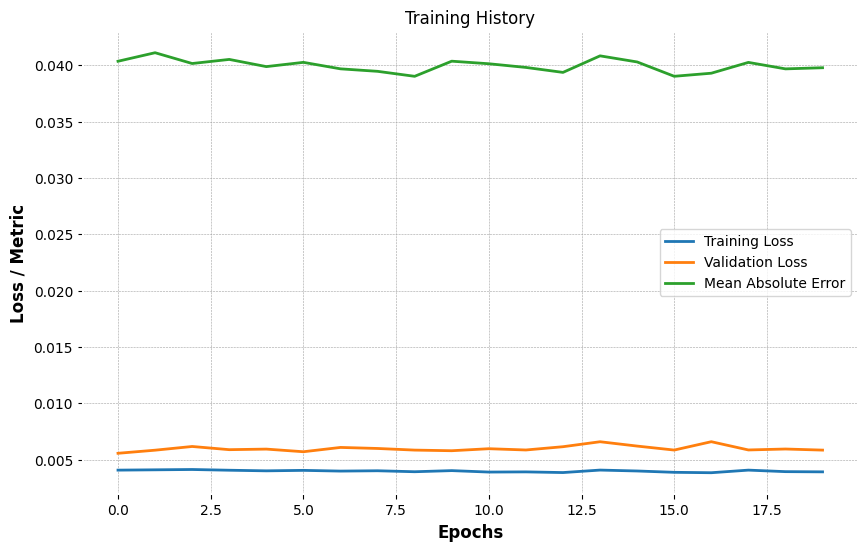

In [52]:
# Plotting the training history
plt.figure(figsize=(10, 6))

# Plotting training loss
plt.plot(history.history['loss'], label='Training Loss')

if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

if 'mae' in history.history:
     plt.plot(history.history['mae'], label='Mean Absolute Error')

plt.xlabel('Epochs')
plt.ylabel('Loss / Metric')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


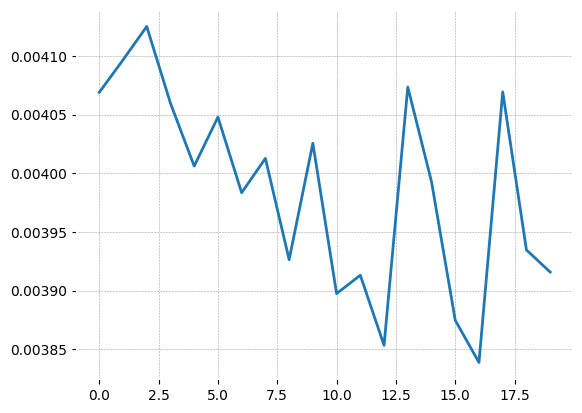

In [53]:
losss = model.history.history['loss']
plt.plot(range(len(losss)),losss)

In [56]:
# Check the list of metrics defined during model compilation
print(model.metrics_names)


['loss', 'mae']


In [57]:
# Evaluate the model on the test data
mse = model.evaluate(generator_test)[1]

print(f'Mean Squared Error (MSE) on Test Data: {mse}')

190/190 [==============================] - 1s 7ms/step - loss: 0.0058 - mae: 0.0378
Mean Squared Error (MSE) on Test Data: 0.037783846259117126
